## Predicting Players ratings

In this project you are going to predict the overall rating of soccer player based on their attributes
such as 'crossing', 'finishing etc.

### Data Collection


In [1]:
import sqlite3
import pandas as pd
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from math import sqrt
import matplotlib.pyplot as plt
import matplotlib.lines as mlines
import matplotlib.transforms as mtransforms
import seaborn as sns

In [2]:
#creating the connection
conn = sqlite3.connect('soccer.sqlite')
c=conn.cursor()
df=pd.read_sql_query("SELECT * FROM Player_Attributes", conn)

In [3]:
#looking at the data at hand
df.head()

,id,player_fifa_api_id,player_api_id,date,overall_rating,potential,preferred_foot,attacking_work_rate,defensive_work_rate,crossing,...,vision,penalties,marking,standing_tackle,sliding_tackle,gk_diving,gk_handling,gk_kicking,gk_positioning,gk_reflexes
0,1,218353,505942,2016-02-18 00:00:00,67.0,71.0,right,medium,medium,49.0,...,54.0,48.0,65.0,69.0,69.0,6.0,11.0,10.0,8.0,8.0
1,2,218353,505942,2015-11-19 00:00:00,67.0,71.0,right,medium,medium,49.0,...,54.0,48.0,65.0,69.0,69.0,6.0,11.0,10.0,8.0,8.0
2,3,218353,505942,2015-09-21 00:00:00,62.0,66.0,right,medium,medium,49.0,...,54.0,48.0,65.0,66.0,69.0,6.0,11.0,10.0,8.0,8.0
3,4,218353,505942,2015-03-20 00:00:00,61.0,65.0,right,medium,medium,48.0,...,53.0,47.0,62.0,63.0,66.0,5.0,10.0,9.0,7.0,7.0
4,5,218353,505942,2007-02-22 00:00:00,61.0,65.0,right,medium,medium,48.0,...,53.0,47.0,62.0,63.0,66.0,5.0,10.0,9.0,7.0,7.0


the only columns that have non-numerical values are: preferred_foot, attacking_work_rate, defensive_work_rate.

### Basic Analysis of Data

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 183978 entries, 0 to 183977
Data columns (total 42 columns):
id                     183978 non-null int64
player_fifa_api_id     183978 non-null int64
player_api_id          183978 non-null int64
date                   183978 non-null object
overall_rating         183142 non-null float64
potential              183142 non-null float64
preferred_foot         183142 non-null object
attacking_work_rate    180748 non-null object
defensive_work_rate    183142 non-null object
crossing               183142 non-null float64
finishing              183142 non-null float64
heading_accuracy       183142 non-null float64
short_passing          183142 non-null float64
volleys                181265 non-null float64
dribbling              183142 non-null float64
curve                  181265 non-null float64
free_kick_accuracy     183142 non-null float64
long_passing           183142 non-null float64
ball_control           183142 non-null float64
accele

In [5]:
df.columns

Index(['id', 'player_fifa_api_id', 'player_api_id', 'date', 'overall_rating',
       'potential', 'preferred_foot', 'attacking_work_rate',
       'defensive_work_rate', 'crossing', 'finishing', 'heading_accuracy',
       'short_passing', 'volleys', 'dribbling', 'curve', 'free_kick_accuracy',
       'long_passing', 'ball_control', 'acceleration', 'sprint_speed',
       'agility', 'reactions', 'balance', 'shot_power', 'jumping', 'stamina',
       'strength', 'long_shots', 'aggression', 'interceptions', 'positioning',
       'vision', 'penalties', 'marking', 'standing_tackle', 'sliding_tackle',
       'gk_diving', 'gk_handling', 'gk_kicking', 'gk_positioning',
       'gk_reflexes'],
      dtype='object')

### Data Wrangling

In [6]:
#handle missing data
df.isnull().any()

id                     False
player_fifa_api_id     False
player_api_id          False
date                   False
overall_rating          True
potential               True
preferred_foot          True
attacking_work_rate     True
defensive_work_rate     True
crossing                True
finishing               True
heading_accuracy        True
short_passing           True
volleys                 True
dribbling               True
curve                   True
free_kick_accuracy      True
long_passing            True
ball_control            True
acceleration            True
sprint_speed            True
agility                 True
reactions               True
balance                 True
shot_power              True
jumping                 True
stamina                 True
strength                True
long_shots              True
aggression              True
interceptions           True
positioning             True
vision                  True
penalties               True
marking       

In [7]:
df.shape

(183978, 42)

In [8]:
#how many data points are missing in each column?
df.isnull().sum(axis=0)

id                        0
player_fifa_api_id        0
player_api_id             0
date                      0
overall_rating          836
potential               836
preferred_foot          836
attacking_work_rate    3230
defensive_work_rate     836
crossing                836
finishing               836
heading_accuracy        836
short_passing           836
volleys                2713
dribbling               836
curve                  2713
free_kick_accuracy      836
long_passing            836
ball_control            836
acceleration            836
sprint_speed            836
agility                2713
reactions               836
balance                2713
shot_power              836
jumping                2713
stamina                 836
strength                836
long_shots              836
aggression              836
interceptions           836
positioning             836
vision                 2713
penalties               836
marking                 836
standing_tackle     

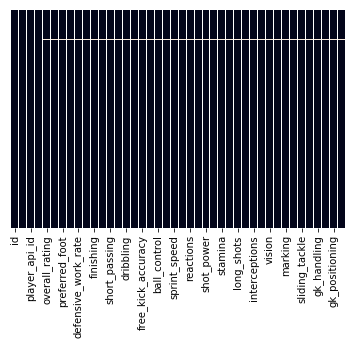

In [9]:
sns.heatmap(df.isnull(), yticklabels=False, cbar=False)

In [10]:
#drop any rows with missing data
df=df.dropna()

In [11]:
df.shape[0]

180354

### Handling missing data 
since it is not said how data went missing it is safe to assume in this case that they are Missing at Random (MAR), or Missing Completely at Random (MCAR). Therefore one way to handle the data is by removing any missing data in order to properly analyze the data at hand.This will be done by Deleting the rows. As you can see there is less than 2% of missing values of the data, therefore I will follow through and delete the missing data.  

In [12]:
df.isnull().sum(axis=0).any().any()

False

In [13]:
# defining the features
feature_columns=['crossing', 'finishing', 'heading_accuracy',
                 'short_passing', 'volleys', 'dribbling', 'curve', 'free_kick_accuracy',
                 'long_passing', 'ball_control', 'acceleration', 'sprint_speed',
                 'agility', 'reactions', 'balance', 'shot_power', 'jumping', 'stamina',
                 'strength', 'long_shots', 'aggression', 'interceptions', 'positioning',
                 'vision', 'penalties', 'marking', 'standing_tackle', 'sliding_tackle',
                 'gk_diving', 'gk_handling', 'gk_kicking', 'gk_positioning',
                 'gk_reflexes','potential']
data = df[feature_columns]

In [14]:
data.head()

,crossing,finishing,heading_accuracy,short_passing,volleys,dribbling,curve,free_kick_accuracy,long_passing,ball_control,...,penalties,marking,standing_tackle,sliding_tackle,gk_diving,gk_handling,gk_kicking,gk_positioning,gk_reflexes,potential
0,49.0,44.0,71.0,61.0,44.0,51.0,45.0,39.0,64.0,49.0,...,48.0,65.0,69.0,69.0,6.0,11.0,10.0,8.0,8.0,71.0
1,49.0,44.0,71.0,61.0,44.0,51.0,45.0,39.0,64.0,49.0,...,48.0,65.0,69.0,69.0,6.0,11.0,10.0,8.0,8.0,71.0
2,49.0,44.0,71.0,61.0,44.0,51.0,45.0,39.0,64.0,49.0,...,48.0,65.0,66.0,69.0,6.0,11.0,10.0,8.0,8.0,66.0
3,48.0,43.0,70.0,60.0,43.0,50.0,44.0,38.0,63.0,48.0,...,47.0,62.0,63.0,66.0,5.0,10.0,9.0,7.0,7.0,65.0
4,48.0,43.0,70.0,60.0,43.0,50.0,44.0,38.0,63.0,48.0,...,47.0,62.0,63.0,66.0,5.0,10.0,9.0,7.0,7.0,65.0


In [15]:
#need to define the independent and dependent variable
X=df[feature_columns]     # features are the independent variables that determine the players rating(dependent variable)
y=df['overall_rating']

In [16]:
y.head()

0    67.0
1    67.0
2    62.0
3    61.0
4    61.0
Name: overall_rating, dtype: float64

In [17]:
# need to check the correlation with the independent and dependent variables
for f in feature_columns:
    related = y.corr(X[f])      #Pearson correlation is being used
    print("%s: %f" %(f,related))

crossing: 0.357320
finishing: 0.330079
heading_accuracy: 0.313324
short_passing: 0.458243
volleys: 0.361739
dribbling: 0.354191
curve: 0.357566
free_kick_accuracy: 0.349800
long_passing: 0.434525
ball_control: 0.443991
acceleration: 0.243998
sprint_speed: 0.253048
agility: 0.239963
reactions: 0.771856
balance: 0.160211
shot_power: 0.428053
jumping: 0.258978
stamina: 0.325606
strength: 0.315684
long_shots: 0.392668
aggression: 0.322782
interceptions: 0.249094
positioning: 0.368978
vision: 0.431493
penalties: 0.392715
marking: 0.132185
standing_tackle: 0.163986
sliding_tackle: 0.128054
gk_diving: 0.027675
gk_handling: 0.006717
gk_kicking: 0.028799
gk_positioning: 0.008029
gk_reflexes: 0.007804
potential: 0.765435


When looking at correlation between the independent and dependent variable keep in mind that the closer "p" is to s, the more an increase in one variable will associate with the other. If X and Y are independent of each other "p" will be closer to 0. 

The above analysis showed the highest correlation to the overall_rating was potnetial, reactions, short_passing, ball_control, and vision 

In [19]:
#plotting the graph using matplotlib library
def plot_dataframe(X, y_label):  
    color='blue'
    fig = plt.gcf()
    fig.set_size_inches(20, 10)
    plt.ylabel(y_label)

    ax = plotDf.correlation.plot(linewidth=3.3, color=color)
    ax.set_xticks(plotDf.index)
    ax.set_xticklabels(plotDf.attributes, rotation=75); 
    plt.show()

In [20]:
correlations=[y.corr(X[f]) for f in feature_columns]

In [21]:
plotDf=pd.DataFrame({'attributes':feature_columns, 'correlation': correlations})

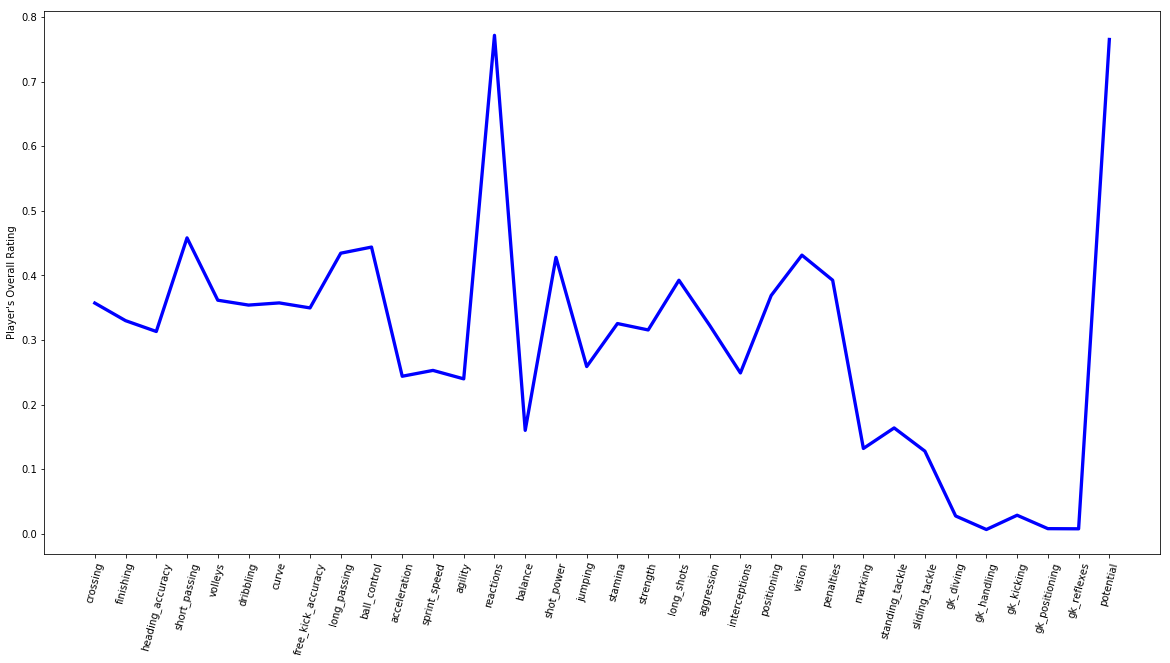

In [22]:
#plot the graph
plot_dataframe(plotDf, 'Player\'s Overall Rating')

In [23]:
#splitting the data sets into training vs testing
X_train,X_test,y_train,y_test = train_test_split(X,y, test_size = 0.2, random_state = 0) 

In [24]:
#standardize all the values in the features in order to use linear regression
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
X_train=sc.fit_transform(X_train)
X_test =sc.transform(X_test)

In [25]:
#fitting multiple linear regression to the training set
regressor = LinearRegression()
regressor.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [26]:
#predicting the test set results
y_predict = regressor.predict(X_test)

In [27]:
print('Coefficients: \n',regressor.coef_)

Coefficients: 
 [ 0.39456648  0.23959378  1.14438902  0.71600175  0.074594   -0.23140155
  0.2110157   0.22249867  0.10649741  2.04001039  0.08110143  0.11343461
 -0.11042355  1.92369046  0.09982439  0.26208816  0.17700792 -0.07098131
  0.74197141 -0.24141387  0.33581266  0.24030081 -0.20096862 -0.03320184
  0.22063513  0.68113393  0.06984685 -0.6104115   2.77988134  0.53312903
 -0.71230568  0.90318142  0.38027803  2.48961902]


Note: Positive coefficients shows that as the value of the independent variable increases the mean of the dependent variable also increases. Negative coefficients shows that as the independent variable increases the dependent variable decreases.

In [28]:
#finding the intercept
regressor.intercept_

68.63028215382269

In [29]:
#checking the mean square value
mse = mean_squared_error(y_test,y_predict)
print(mse)

7.729000096898106


In [30]:
#RMSE
print('RMSE: \n', 
      np.sqrt(mean_squared_error(y_test,y_predict)))

RMSE: 
 2.780107929001697


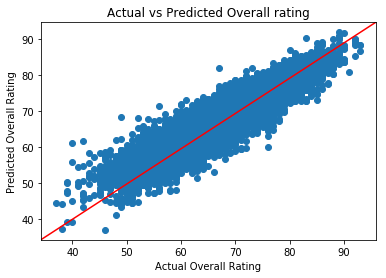

In [31]:
fig, ax = plt.subplots()
ax.scatter(y_test, y_predict)
line = mlines.Line2D([0, 1], [0, 1], color='red')
transform = ax.transAxes
line.set_transform(transform)
ax.add_line(line)
plt.xlabel('Actual Overall Rating')
plt.ylabel('Predicted Overall Rating')
plt.title('Actual vs Predicted Overall rating')
plt.show()

In [32]:
#accuracy of the model
score = regressor.score(X_test,y_test)*100
print(score, '%')

84.16945040119876 %


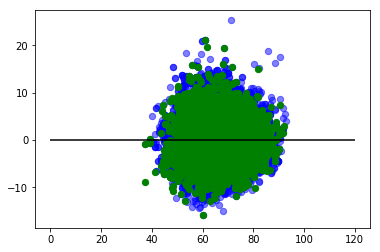

In [33]:
#plot
plt.scatter(regressor.predict(X_train),regressor.predict(X_train)-y_train, c='b', s=40,alpha=0.5)
plt.scatter(regressor.predict(X_test),regressor.predict(X_test)-y_test, c='g',s=40)
plt.hlines(y=0,xmin=0,xmax=120)        #horizontal line
plt.show()

In [34]:
#Building the optimal model using Backward Elimination 
import statsmodels.formula.api as sm
X=np.append(arr=np.ones((X.shape[0],1)).astype(int),values=X,axis=1)

In [35]:
X_opt = X

In [36]:
regressor_OLS=sm.OLS(endog=y,exog=X_opt).fit()
regressor_OLS.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:         overall_rating   R-squared:                       0.842
Model:                            OLS   Adj. R-squared:                  0.842
Method:                 Least Squares   F-statistic:                 2.820e+04
Date:                Wed, 12 Sep 2018   Prob (F-statistic):               0.00
Time:                        00:01:40   Log-Likelihood:            -4.4136e+05
No. Observations:              180354   AIC:                         8.828e+05
Df Residuals:                  180319   BIC:                         8.831e+05
Df Model:                          34                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -3.6097      0.094    -38.285      0.000      -3.795      -3.425
x1             0.0222      0.001     26.476      0.000       0.021       0.024
x2             0.0117      0.001     12.651      0.000       0.010       0.014
x3             0.0698      0.001     84.979      0.000       0.068       0.071
x4             0.0501      0.001     36.184      0.000       0.047       0.053
x5             0.0043      0.001      5.151      0.000       0.003       0.006
x6            -0.0130      0.001    -11.157      0.000      -0.015      -0.011
x7             0.0117      0.001     14.531      0.000       0.010       0.013
x8             0.0126      0.001     17.633      0.000       0.011       0.014
x9             0.0073      0.001      7.648      0.000       0.005       0.009
x10            0.1349      0.002     84.652      0.000       0.132       0.138
x11            0.0067      0.001      4.806      0.000       0.004       0.009
x12            0.0089      0.001      6.777      0.000       0.006       0.011
x13           -0.0086      0.001     -8.466      0.000      -0.011      -0.007
x14            0.2103      0.001    193.160      0.000       0.208       0.212
x15            0.0082      0.001     10.424      0.000       0.007       0.010
x16            0.0168      0.001     19.043      0.000       0.015       0.019
x17            0.0157      0.001     21.505      0.000       0.014       0.017
x18           -0.0052      0.001     -6.361      0.000      -0.007      -0.004
x19            0.0614      0.001     72.918      0.000       0.060       0.063
x20           -0.0135      0.001    -14.691      0.000      -0.015      -0.012
x21            0.0201      0.001     29.179      0.000       0.019       0.021
x22            0.0126      0.001     17.049      0.000       0.011       0.014
x23           -0.0107      0.001    -13.478      0.000      -0.012      -0.009
x24           -0.0020      0.001     -2.324      0.020      -0.004      -0.000
x25            0.0143      0.001     19.061      0.000       0.013       0.016
x26            0.0325      0.001     28.820      0.000       0.030       0.035
x27            0.0032      0.001      2.424      0.015       0.001       0.006
x28           -0.0286      0.001    -25.856      0.000      -0.031      -0.026
x29            0.1631      0.001    110.924      0.000       0.160       0.166
x30            0.0335      0.002     17.383      0.000       0.030       0.037
x31           -0.0340      0.001    -54.153      0.000      -0.035      -0.033
x32            0.0558      0.002     29.084      0.000       0.052       0.060
x33            0.0247      0.002     13.126      0.000       0.021       0.028
x34            0.3779      0.001    257.813      0.000       0.375       0.381
==============================================================================
Om

All the features are important when calculating the overall rating since p-value <.05 